# Decision Trees and Random Forest Project

Exploring data in the years 2007-2010 from the lending club prior to their scandal in 2016.

This project will try to develop a machine learning model using a Supervised Learning type of Machine Learning to predict whether or not someone will pay back their loan.

Data from: (https://www.lendingclub.com/info/download-data.action)

# Imports

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
loans = pd.read_csv('loan_data.csv')

In [64]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [65]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [66]:
loans.head(4)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0


# Data Analysis
Histogram of the FICO's for each of the credit card policy number.

Text(0, 0.5, 'FICO')

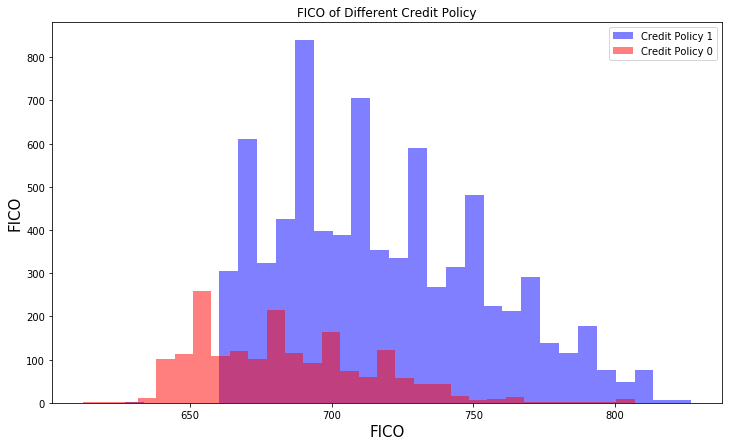

In [67]:
plt.figure(figsize = (12,7))
loans[loans['credit.policy']==1]['fico'].plot.hist(alpha = .5, color = 'blue', bins = 30, label = 'Credit Policy 1')
loans[loans['credit.policy']==0]['fico'].plot.hist(alpha = .5, color = 'red', bins = 30, label = 'Credit Policy 0')
plt.title('FICO of Different Credit Policy')
plt.legend()
plt.xlabel('FICO', fontsize = 15)
plt.ylabel('FICO', fontsize = 15)

Histogram of the FICO's depending if the loan was fully paid or not.

Text(0, 0.5, 'FICO')

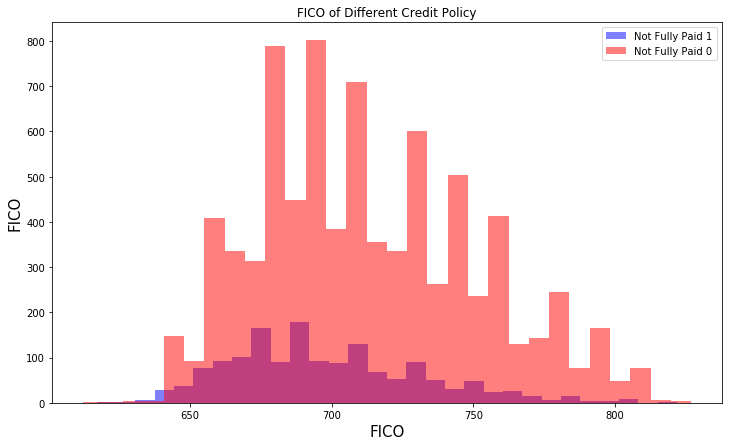

In [68]:
plt.figure(figsize = (12,7))
loans[loans['not.fully.paid']==1]['fico'].plot.hist(alpha = .5, color = 'blue', bins = 30, label = 'Not Fully Paid 1')
loans[loans['not.fully.paid']==0]['fico'].plot.hist(alpha = .5, color = 'red', bins = 30, label = 'Not Fully Paid 0')
plt.title('FICO of Different Credit Policy')
plt.legend()
plt.xlabel('FICO', fontsize = 15)
plt.ylabel('FICO', fontsize = 15)

Countplot showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

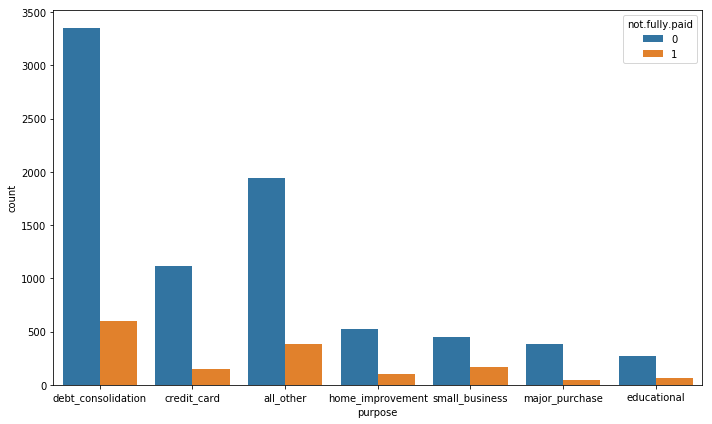

In [69]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'purpose',data = loans, hue = 'not.fully.paid')
plt.tight_layout()

Jointplot of the FICO vs. the interest rate to confirm any correlation. 

C:\Users\Shayan Asgari\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


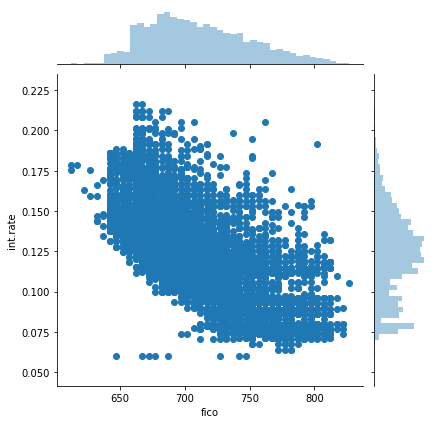

In [70]:
sns.jointplot(x = 'fico', y = 'int.rate', data = loans)

Linear plot of the FICO vs. the interest rate depending on if the loan was paid or not. 

Conclude that the interest rate and FICO is higher for those who do not fully pay back their loan. 

<Figure size 864x144 with 0 Axes>

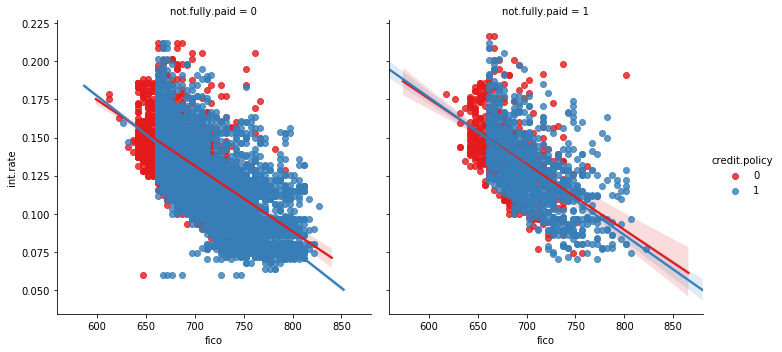

In [71]:
plt.figure(figsize=(12,2))
sns.lmplot(x = 'fico', y = 'int.rate', data= loans, col = 'not.fully.paid', hue = 'credit.policy', palette = 'Set1')

# Setting up the Data for Random Forest Classification Model

In [72]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features
Purpose is currently categorical, but to use K Nearest neighbors and then get them to a training set the data must be numerical. 

Therefore, we use Pandas' built in dummy generator.

In [73]:
dummy = ['purpose']
#Drop first = true is to avoid multicollinearity 

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [74]:
'''DOING DUMMIES OF LOANS['purpose'] unless you concat. that DF with the current DF and delete the purpose column of 
original after'''
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)
final_data.head(1)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0


In [75]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Training the Data

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X = final_data.drop('not.fully.paid', axis= 1)
y= final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtc = DecisionTreeClassifier()

In [80]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree

In [81]:
predictions = dtc.predict(X_test)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.20       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [84]:
print(confusion_matrix(y_test, predictions))

[[1989  442]
 [ 342  101]]


## Training the Random Forest model

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rfc = RandomForestClassifier(n_estimators = 600)

In [87]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

In [88]:
rfc_predictions = rfc.predict(X_test)

In [89]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.02      0.04       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [90]:
print(confusion_matrix(y_test, rfc_predictions))

[[2424    7]
 [ 433   10]]


What performed better the random forest or the decision tree?

Either have their pros and cons. It is over personal preference whether you want better precision or recall.
While Random Forests are composed of a collection of decision trees, they are also more robust and successful than a single decision tree. They also yield lower biases and prevent overfitting to an extent by averaging out several tree's prediction. 
Regression trees are used when the dependent variable is a continuous variable and classification trees are used when the dependent variable is categorical variable.
Nodes of a decision tree show a split of a value for a certain attribute and an edge is an outcome of a split. There is also a root(node that performs first split), and leaves which are the outcomes. Bagging is for reducing the variance and is used for Random Forests. Random forests leave out candidate features from each split which "decorrelates" the trees(makes them independent from eachother and we wont be affected by features that strongly predict class' data) so that in the averaging process the variance will be decreased.